# College Scorecard Data Analysis
## Modeling Income-Share Agreements from College Outcomes Data (US Focus)
In this notebook, we are trying to model whether a school's parameters affect the outcomes of their graduates. This is essential for creating profitable income-share agreement contracts where students' financing repayments is based on their future income.

### Kaggle Kernel Notes
We used a Kaggle Kernel given the size of our dataset and the efficiency of cloud compute and cloud storage offered by the kernel.
Below are some essential notes about this Python 3 Jupyter Notebook Environment:
- It is defined by the `kaggle/python` Docker image: https://github.com/kaggle/docker-python
- Input data files are available in the read-only `../input/` directory
- You can write up to 20GB to the current directory `/kaggle/working/` that gets preserved as output when creating version 
- You can also write temporary files to `/kaggle/temp/`, but they won't be saved outside of the current session

In [1]:
import os
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # advanced visualisations
import matplotlib.pyplot as plt # data visualisation
warnings.simplefilter("once")

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/college-scorecard-aggregated-dataset/MERGED2015_16_PP.csv
/kaggle/input/college-scorecard-aggregated-dataset/MERGED2019_20_PP.csv
/kaggle/input/college-scorecard-aggregated-dataset/CollegeScorecardDataDictionary.xlsx
/kaggle/input/college-scorecard-aggregated-dataset/MERGED2016_17_PP.csv
/kaggle/input/college-scorecard-aggregated-dataset/MERGED2021_22_PP.csv
/kaggle/input/college-scorecard-aggregated-dataset/MERGED2020_21_PP.csv
/kaggle/input/college-scorecard-aggregated-dataset/InstitutionDataDocumentation.pdf
/kaggle/input/college-scorecard-aggregated-dataset/MERGED2018_19_PP.csv
/kaggle/input/college-scorecard-aggregated-dataset/FieldOfStudyDataDocumentation.pdf
/kaggle/input/college-scorecard-aggregated-dataset/MERGED2017_18_PP.csv


## Exploratory Data Analysis

### Data Importation & Consolidation

In [6]:
# Define the file names for the year we want to import data for
years = [2018,2017,2016,2015] # Years of data we are interested in
fnames = list()
for year in years:
    fname = "/kaggle/input/college-scorecard-aggregated-dataset/MERGED" + str(year) + "_" + str(year+1)[2:] + "_PP.csv" #Based on format of file names
    fnames.append(fname)
print(len(fnames))

4


In [9]:
## Import first dataset – the base year dataset
data = pd.read_csv(str(fnames[0]), low_memory=False)
data["DATAYEAR"] = years[0]
dshapes = [data.shape]

## Import other datasets and concat into the base dataset
for i in range(1,len(fnames)):
    df = pd.read_csv(str(fnames[i]), low_memory=False)
    df["DATAYEAR"] = years[i]
    dshapes.append(df.shape) # Track the shape of the added data
    data = pd.concat([data, df], ignore_index=True)

## PrivacySuppressed has been used as an alternative to None in Object Columns    
data = data.map(lambda x: None if x == "PrivacySuppressed" else x, na_action='ignore')

pd.set_option('display.max_columns', 5000)
print(data.shape, dshapes)
data.head()

(28823, 3233) [(6807, 3233), (7112, 3233), (7238, 3233), (7666, 3233)]


UNITID    OPEID  OPEID6                               INSTNM        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

  STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  SCH_DEG  HCM2  MAIN  \
0     AL       35762           NaN      NaN     NaN      3.0   NaN     1   
1     AL  35294-0110           NaN      NaN     NaN      3.0   NaN     1   
2     AL  36117-3553           NaN      NaN     NaN      3.0   NaN     1   
3     AL       35899           NaN      NaN     NaN      3.0   NaN     1   
4     AL  36104-0271           NaN      NaN     NaN      3.0   NaN     1   

   NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2  \
0          1        3        4        1        1       5     NaN      NaN   
1          1        3        4        1        1       5     NaN      NaN   
2          1        3        4        2        1       5     NaN      NaN   
3          1        3        4        1        1       5     NaN      NaN   
4          1        3        4        1        1       5     NaN      NaN   

   LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  TRIBAL  \
0       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
1       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
2       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
3       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   
4       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN     NaN   

   AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  ADM_RATE_ALL  \
0      NaN  NaN    NaN      NaN        NaN       NaN    0.8986        0.8986   
1      NaN  NaN    NaN      NaN        NaN       NaN    0.9211        0.9211   
2      NaN  NaN    NaN      NaN        NaN       NaN       NaN           NaN   
3      NaN  NaN    NaN      NaN        NaN       NaN    0.8087        0.8087   
4      NaN  NaN    NaN      NaN        NaN       NaN    0.9774        0.9774   

   SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  SATVRMID  SATMTMID  \
0    430.0    520.0    420.0    510.0      NaN      NaN     475.0     465.0   
1    490.0    620.0    490.0    620.0      NaN      NaN     555.0     555.0   
2      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
3    560.0    700.0    450.0    680.0      NaN      NaN     630.0     565.0   
4    440.0    520.0    420.0    510.0      NaN      NaN     480.0     465.0   

   SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  ACTMT75  ACTWR25  \
0       NaN     16.0     19.0     14.0     20.0     15.0     18.0      NaN   
1       NaN     21.0     29.0     22.0     31.0     19.0     26.0      NaN   
2       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       NaN     25.0     31.0     25.0     34.0     24.0     30.0      NaN   
4       NaN     16.0     20.0     14.0     20.0     15.0     18.0      NaN   

   ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  SAT_AVG  SAT_AVG_ALL  \
0      NaN      18.0      17.0      17.0       NaN    957.0        957.0   
1      NaN      25.0      27.0      23.0       NaN   1220.0       1220.0   
2      NaN       NaN       NaN       NaN       NaN      NaN          NaN   
3      NaN      28.0      30.0      27.0       NaN   1314.0       1314.0   
4      NaN      18.0      17.0      17.0       NaN    972.0        972.0   

   PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  \
0  0.0394  0.0237  0.0039  0.0000  0.0000  0.0394  0.0592     0.0  0.0710   
1  0.0000  0.0000  0.0000  0.0016  0.0375  0.0000  0.0139     0.0  0.0717   
2  0.000

In [11]:
data.MDEARN_ALL

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
28818   NaN
28819   NaN
28820   NaN
28821   NaN
28822   NaN
Name: MDEARN_ALL, Length: 28823, dtype: float64

In [5]:
## PrivacySuppressed has been used as an alternative to None in Object Columns
data = data.map(lambda x: None if x == "PrivacySuppressed" else x, na_action='ignore')

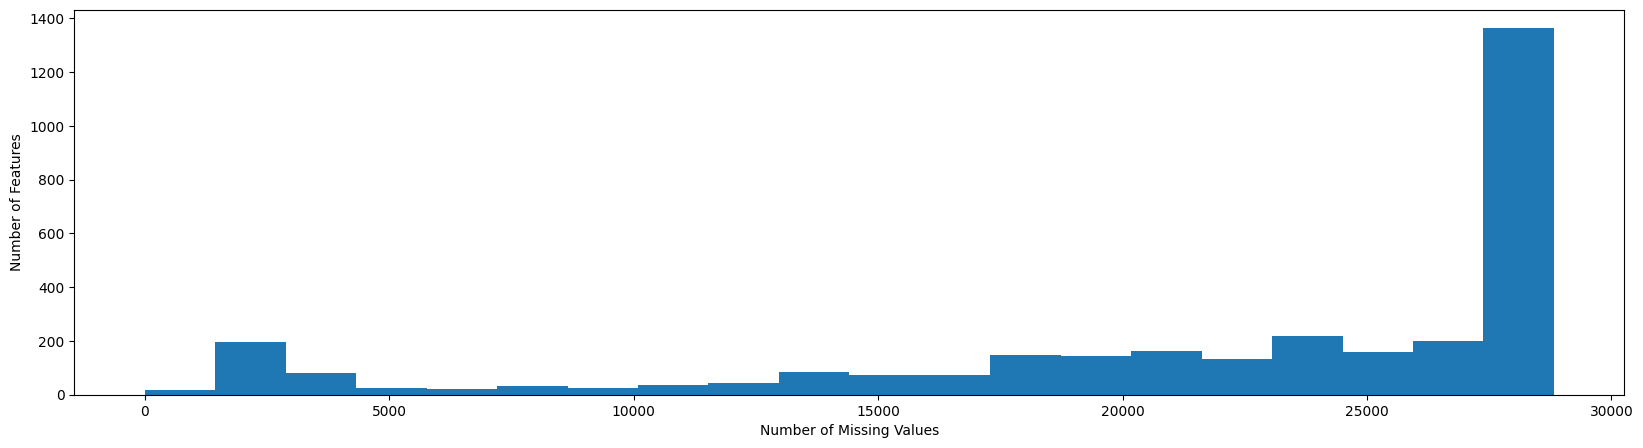

In [6]:
missing_values = data.isnull().sum(axis=0) # Identify all null values in the data
plt.figure(figsize=(20,5))
plt.hist(missing_values,bins=20,label=True)
plt.ylabel("Number of Features")
plt.xlabel("Number of Missing Values")
plt.show()

In [7]:
to_drop = list()
threshold = 0.5 * data.shape[0] #1738 seems to be the number from 0.2 to 0.4
for column in list(data.columns):
    if data[column].isnull().sum() > threshold:
        to_drop.append(column)
        
print(f"Drop {len(to_drop)/data.shape[1]*100}% of the columns")

Drop 82.55490256727498% of the columns


In [8]:
data = data.drop(to_drop,axis=1) ## Drop columns with extreme missingness
data = data.drop_duplicates() ## Drop duplicate rows
print(data.shape)
data.head()

(28823, 564)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,SCH_DEG,MAIN,NUMBRANCH,...,IRPS_ASIAN,IRPS_BLACK,IRPS_HISP,IRPS_NHPI,IRPS_NRA,IRPS_UNKN,IRPS_WHITE,IRPS_WOMEN,IRPS_MEN,DATAYEAR
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0,1,1,...,0.0965,0.6564,0.0000,0.0000,0.1158,0.0039,0.1236,0.4672,0.5328,2018
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,1,1,...,0.1522,0.0630,0.0307,0.0004,0.0471,0.0012,0.6968,0.4141,0.5859,2018
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0,1,1,...,0.0000,0.0909,0.0000,0.0000,0.0000,0.0000,0.9091,0.1515,0.8485,2018
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,1,1,...,0.1729,0.0490,0.0202,0.0029,0.0461,0.0000,0.7061,0.4496,0.5504,2018
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,3.0,1,1,...,0.1385,0.6104,0.0130,0.0043,0.0000,0.0000,0.2338,0.5022,0.4978,2018


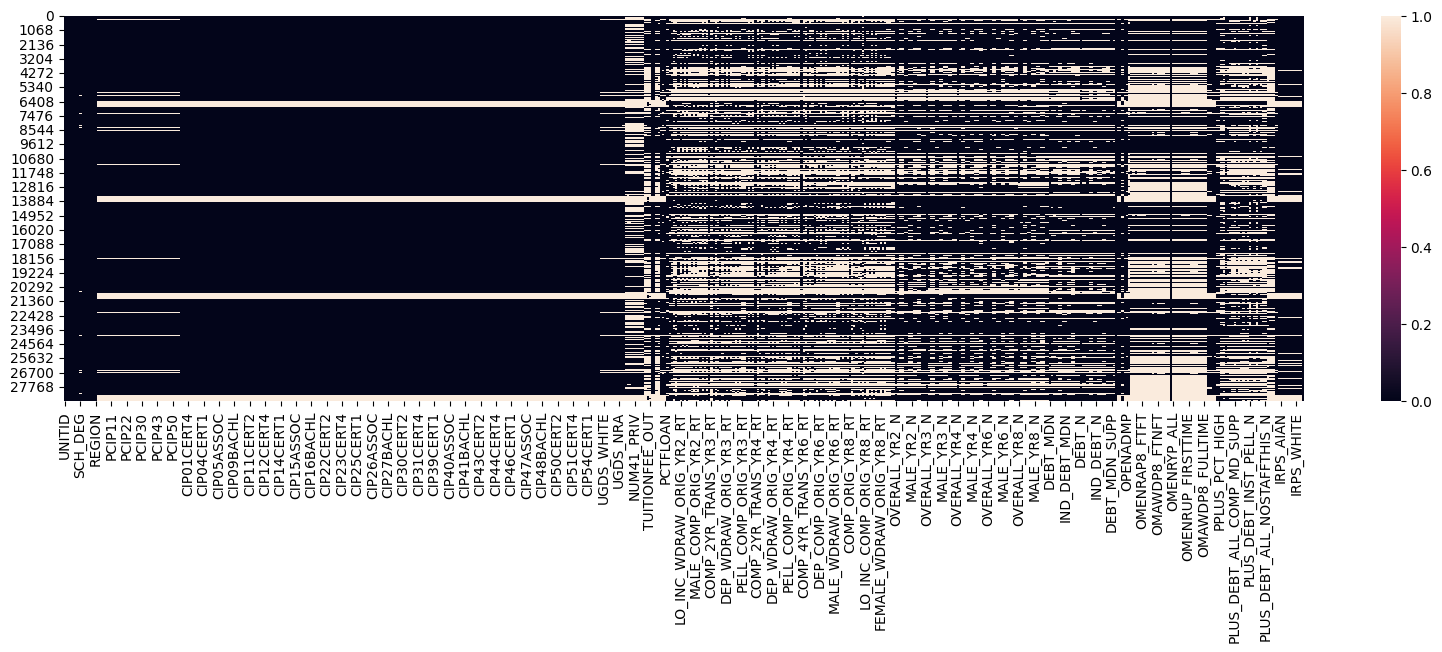

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull())
plt.show()

In [46]:
data.PPTUG_EF.unique()

array([0.0587, 0.2425, 0.5014, ..., 0.355 , 0.5375, 0.6422])

In [ ]:
to_drop_cols = ["OPEID", "OPEID6", "INSTNM", "CITY", "ZIP", ""]
one_hot_cols = ["STABBR", "REGION"]
str_ordinal_cols = [""]
int_ordinal_cols = ["SCH_DEG", "PREDDEG","HIGHDEG","CONTROL"] #Categorical columns with inherent ordering
dummy_cols = ["UNITID", ""] #Categorical integers with high number of unique options
## CIP (Int Ordinal), PCIP (Percentage of CIP), 

In [10]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28823 entries, 0 to 28822
Data columns (total 564 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    UNITID                       int64  
 1    OPEID                        int64  
 2    OPEID6                       int64  
 3    INSTNM                       object 
 4    CITY                         object 
 5    STABBR                       object 
 6    ZIP                          object 
 7    SCH_DEG                      float64
 8    MAIN                         int64  
 9    NUMBRANCH                    int64  
 10   PREDDEG                      int64  
 11   HIGHDEG                      int64  
 12   CONTROL                      int64  
 13   ST_FIPS                      int64  
 14   REGION                       int64  
 15   PCIP01                       float64
 16   PCIP03                       float64
 17   PCIP04                       float64
 18   PCIP05                  

In [49]:
pd.set_option('display.max_columns', 500)
data.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,...,COMP_ORIG_YR4_RT,COMP_2YR_TRANS_YR4_RT,WDRAW_ORIG_YR4_RT,WDRAW_4YR_TRANS_YR4_RT,WDRAW_2YR_TRANS_YR4_RT,LO_INC_COMP_ORIG_YR4_RT,LO_INC_WDRAW_ORIG_YR4_RT,DEP_COMP_ORIG_YR4_RT,DEP_WDRAW_ORIG_YR4_RT,IND_COMP_ORIG_YR4_RT,IND_WDRAW_ORIG_YR4_RT,FEMALE_COMP_ORIG_YR4_RT,FEMALE_WDRAW_ORIG_YR4_RT,MALE_COMP_ORIG_YR4_RT,MALE_WDRAW_ORIG_YR4_RT,PELL_COMP_ORIG_YR4_RT,NOPELL_COMP_ORIG_YR4_RT,FIRSTGEN_COMP_ORIG_YR4_RT,FIRSTGEN_WDRAW_ORIG_YR4_RT,NOT1STGEN_COMP_ORIG_YR4_RT,NOT1STGEN_WDRAW_ORIG_YR4_RT,COMP_ORIG_YR6_RT,COMP_4YR_TRANS_YR6_RT,COMP_2YR_TRANS_YR6_RT,WDRAW_ORIG_YR6_RT,WDRAW_4YR_TRANS_YR6_RT,WDRAW_2YR_TRANS_YR6_RT,LO_INC_COMP_ORIG_YR6_RT,LO_INC_WDRAW_ORIG_YR6_RT,DEP_COMP_ORIG_YR6_RT,DEP_WDRAW_ORIG_YR6_RT,IND_COMP_ORIG_YR6_RT,IND_WDRAW_ORIG_YR6_RT,FEMALE_COMP_ORIG_YR6_RT,FEMALE_WDRAW_ORIG_YR6_RT,MALE_COMP_ORIG_YR6_RT,MALE_WDRAW_ORIG_YR6_RT,PELL_COMP_ORIG_YR6_RT,NOPELL_COMP_ORIG_YR6_RT,FIRSTGEN_COMP_ORIG_YR6_RT,FIRSTGEN_WDRAW_ORIG_YR6_RT,NOT1STGEN_COMP_ORIG_YR6_RT,NOT1STGEN_WDRAW_ORIG_YR6_RT,COMP_ORIG_YR8_RT,COMP_4YR_TRANS_YR8_RT,COMP_2YR_TRANS_YR8_RT,WDRAW_ORIG_YR8_RT,WDRAW_4YR_TRANS_YR8_RT,WDRAW_2YR_TRANS_YR8_RT,UNKN_ORIG_YR8_RT,LO_INC_COMP_ORIG_YR8_RT,LO_INC_WDRAW_ORIG_YR8_RT,DEP_COMP_ORIG_YR8_RT,DEP_WDRAW_ORIG_YR8_RT,IND_COMP_ORIG_YR8_RT,IND_WDRAW_ORIG_YR8_RT,FEMALE_COMP_ORIG_YR8_RT,FEMALE_WDRAW_ORIG_YR8_RT,MALE_COMP_ORIG_YR8_RT,MALE_WDRAW_ORIG_YR8_RT,PELL_COMP_ORIG_YR8_RT,NOPELL_COMP_ORIG_YR8_RT,FIRSTGEN_COMP_ORIG_YR8_RT,NOT1STGEN_COMP_ORIG_YR8_RT